<a href="https://colab.research.google.com/github/Khainguyen1349/ResearchWithGPT/blob/main/Ray_Tracing_and_PO_Modeling_of_LWA_Combined_with_Lens_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://ieeexplore.ieee.org/document/10742307

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lib import *

# Constants
c = 3e8  # speed of light [m/s]
f = 15e9  # frequency [Hz]
λ0 = c / f  # wavelength in free space [m]
εr = 2.2  # relative permittivity of the dielectric
λd = λ0 / np.sqrt(εr)  # wavelength in dielectric
k0 = 2 * np.pi / λ0
kd = k0 * np.sqrt(εr)

# Antenna geometry
LA = 0.30  # LWA arc length [m]
R_LWA = 0.67  # radius of curvature of the LWA [m]
num_rays = 100  # number of rays/ray tubes

# Leaky-mode parameters (normalized wavenumber from paper)
beta_k0 = 0.6 #0.53
alpha_k0 = 0.0089
beta = beta_k0 * k0
alpha = alpha_k0 * k0

In [2]:
# Center of the LWA arc below the origin for concave shape
theta_LWA = np.linspace(-LA / (2 * R_LWA), LA / (2 * R_LWA), num_rays)
xk, yk, uk, theta_arc = define_concave_lwa(R_LWA, LA, num_rays)
σk, ϕd_k = generate_ray_directions(theta_LWA, beta, kd)

In [3]:
# Circular lens definition
RL = 0.30  # lens radius [m]
lens_center = np.array([0, 0])  # for simplicity
χk, nk = intersect_rays_with_lens(xk, yk, σk, RL)
sk, phi_0_k = compute_exit_directions(σk, nk, εr)

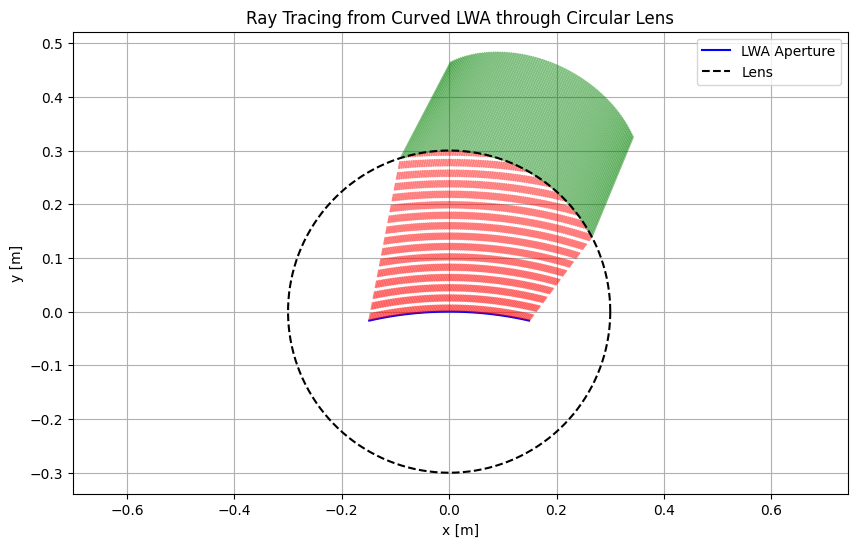

In [4]:
plt.figure(figsize=(10, 6))
# LWA
plt.plot(xk, yk, label="LWA Aperture", color='blue')

# Rays inside lens
for i in range(num_rays):
    plt.plot([xk[i], χk[0, i]], [yk[i], χk[1, i]], 'r--', alpha=0.5)

# Rays outside lens
for i in range(num_rays):
    x_end = χk[0, i] + sk[0, i] * 0.2
    y_end = χk[1, i] + sk[1, i] * 0.2
    plt.plot([χk[0, i], x_end], [χk[1, i], y_end], 'g-', alpha=0.5)

# Lens boundary
θ_lens = np.linspace(0, 2 * np.pi, 300)
plt.plot(RL * np.cos(θ_lens), RL * np.sin(θ_lens), 'k--', label="Lens")

plt.axis("equal")
plt.title("Ray Tracing from Curved LWA through Circular Lens")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()
plt.grid(True)
plt.show()

theta_LWA: 5.312363093705053
ϕd_k: 29.17340929428334
[xk,yk] = [(np.float64(0.06203224444820574), np.float64(-0.002877821798197099))]
Surface normal direction: [0.09258544 0.99570474]
χk: [0.19222352 0.23032611]
Normal vector to the lens' surface: [0.64074507 0.76775371]


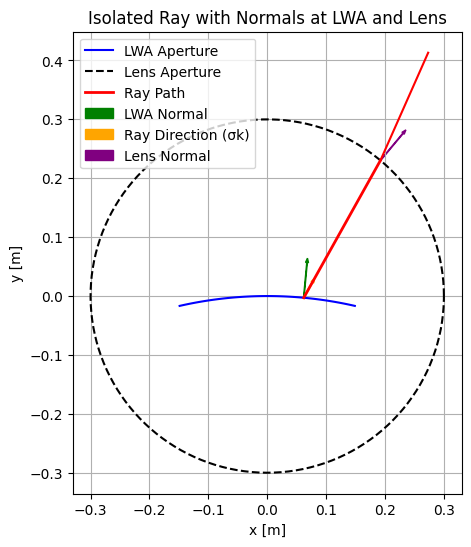

In [5]:
i =70
print(f"theta_LWA: {np.rad2deg(theta_LWA[i])}")
print(f"ϕd_k: {np.rad2deg(ϕd_k[i])}")
print(f"[xk,yk] = [{xk[i],yk[i]}]")
print(f"Surface normal direction: {uk[:,i]}")
print(f"χk: {χk[:,i]}")
print(f"Normal vector to the lens' surface: {nk[:,i]}")

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_aspect('equal')
ax.set_title("Isolated Ray with Normals at LWA and Lens")
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")

# LWA arc
ax.plot(xk, yk, color='blue', label="LWA Aperture")

# Lens boundary
theta = np.linspace(0, 2 * np.pi, 300)
lens_x = RL * np.cos(theta)
lens_y = RL * np.sin(theta)
ax.plot(lens_x, lens_y, 'k--', label="Lens Aperture")

# Selected ray path
ray_start = np.array([xk[i], yk[i]])
ray_end = χk[:, i]
ax.plot([ray_start[0], ray_end[0]], [ray_start[1], ray_end[1]], 'r-', linewidth=2, label="Ray Path")

# Normal at LWA
normal_scale = 0.03
lwa_normal_end = ray_start + normal_scale * uk[:, i]
ax.arrow(ray_start[0], ray_start[1],
         lwa_normal_end[0] * 2 - ray_start[0] * 2, lwa_normal_end[1] *2 - ray_start[1] * 2,
         head_width=0.005, color='green', label="LWA Normal")

# Ray direction σk
ray_dir_end = ray_start + normal_scale * σk[:, i]
ax.arrow(ray_start[0], ray_start[1],
         ray_dir_end[0] - ray_start[0], ray_dir_end[1] - ray_start[1],
         head_width=0.005, color='orange', label="Ray Direction (σk)")

# Normal at lens aperture
lens_normal_end = ray_end + normal_scale * nk[:, i]
ax.arrow(ray_end[0], ray_end[1],
         lens_normal_end[0] * 2 - ray_end[0] * 2, lens_normal_end[1] * 2 - ray_end[1] * 2,
         head_width=0.005, color='purple', label="Lens Normal")

x_end = χk[0, i] + sk[0, i] * 0.2
y_end = χk[1, i] + sk[1, i] * 0.2
ax.plot([χk[0, i], x_end], [χk[1, i], y_end], 'r-')

ax.legend()
ax.grid(True)
plt.show()

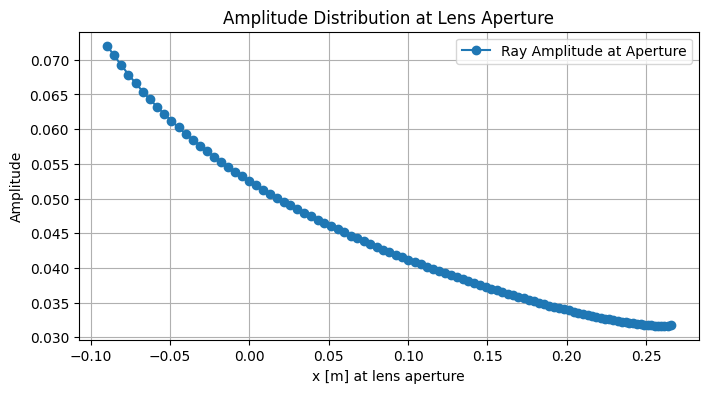

In [6]:
xi_k = R_LWA * (theta_LWA + theta_arc / 2)  # approximate arc-length from start to point
A_aperture, Tk, delta_L_prime, sigma_k = compute_aperture_amplitude(xk, yk, χk, σk, sk, nk, xi_k, alpha, εr)
plt.figure(figsize=(8, 4))
plt.plot(χk[0], A_aperture, 'o-', label="Ray Amplitude at Aperture")
plt.xlabel("x [m] at lens aperture")
plt.ylabel("Amplitude")
plt.title("Amplitude Distribution at Lens Aperture")
plt.grid(True)
plt.legend()
plt.show()

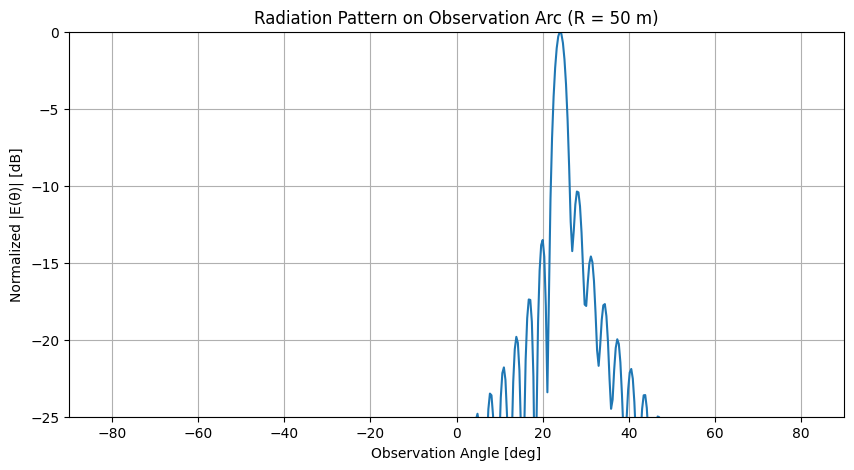

In [7]:
# Parameters
R_obs = 50.0  # observation arc radius [m]
angles_rad = np.linspace(-np.pi / 2, np.pi / 2, 500)  # observation angles
E_theta = farfield_Krchhoff(R_obs, angles_rad, xk, yk, χk, A_aperture, Tk, delta_L_prime, sk, nk, xi_k, beta, kd, k0)
E_theta_norm = E_theta / np.max(np.abs(E_theta))
E_dB = 20 * np.log10(np.abs(E_theta_norm) + 1e-12)

plt.figure(figsize=(10, 5))
plt.plot(np.degrees(angles_rad), E_dB)
plt.title("Radiation Pattern on Observation Arc (R = 50 m)")
plt.xlabel("Observation Angle [deg]")
plt.ylabel("Normalized |E(θ)| [dB]")
plt.xlim(-90, 90)
plt.ylim(-25, 0)
plt.grid(True)
plt.show()

## Loop

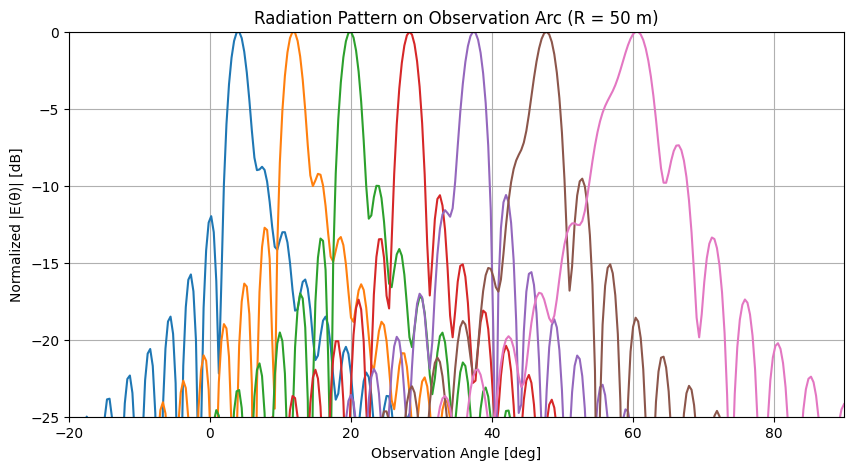

In [8]:
beta_k0 = np.linspace(0.1,1.3,7)
E_dB = np.zeros((len(beta_k0), len(angles_rad)))

for i, beta_k0_ in enumerate(beta_k0):
    beta = beta_k0_ * k0

    σk, ϕd_k = generate_ray_directions(theta_LWA, beta, kd)
    χk, nk = intersect_rays_with_lens(xk, yk, σk, RL)
    sk, phi_0_k = compute_exit_directions(σk, nk, εr)


    xi_k = R_LWA * (theta_LWA + theta_arc / 2)  # approximate arc-length from start to point
    A_aperture, Tk, delta_L_prime, sigma_k = compute_aperture_amplitude(xk, yk, χk, σk, sk, nk, xi_k, alpha, εr)

    E_theta = farfield_Krchhoff(R_obs, angles_rad, xk, yk, χk, A_aperture, Tk, delta_L_prime, sk, nk, xi_k, beta, kd, k0)
    E_theta_norm = E_theta / np.max(np.abs(E_theta))
    E_dB[i,:] = 20 * np.log10(np.abs(E_theta_norm) + 1e-12)

plt.figure(figsize=(10, 5))
for i in range(len(beta_k0)):
    plt.plot(np.degrees(angles_rad), E_dB[i,:])
plt.title("Radiation Pattern on Observation Arc (R = 50 m)")
plt.xlabel("Observation Angle [deg]")
plt.ylabel("Normalized |E(θ)| [dB]")
plt.xlim(-20, 90)
plt.ylim(-25, 0)
plt.grid(True)
plt.show()